**Название проекта**: Статистический анализ компьютерных игр магазина «Стримчик».

**Описание проекта:** Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования**: выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:** 
- Подготовка данных: открыть файл с данными и изучить общую информацию;
- Предобработка данных: заменить названия столбцов, преобразовать данные в нужные типы, обработать пропуски, посчитать суммарные продажи;
- Проведём исследовательский анализ данных: посмотрим, сколько игр выпускалось в разные годы, как менялись продажи по платформам, какие платформы лидируют по продажам, построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам, как влияют на продажи платформы отзывы пользователей и критиков, посмотрим на общее распределение игр по жанрам;
- Составим портрет пользователя каждого региона (NA, EU, JP): самые популярные платформы, самые популярные жанры, влияет ли рейтинг ESRB на продажи в отдельном регионе;
- Проверим гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные";
- Общий вывод.

##  Откроем и изучим общую информацию.

In [1]:
pip install pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [3]:
try:
    data = pd.read_csv('C:/Users/user/Desktop/юпитер/игры/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.shape

(16715, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Промежуточный вывод: размер датасета 16715х11.  
В данных имеются пропуски, которые нужно обработать, названия столбцов привести к одинаковому виду (к нижнему регистру), данные в столбцах привести к необходимому типу (User_Score, Year_of_Release и Critic_Score к типу int).  
Больше всего пропусков в столбцах Critic_Score, User_Score и Rating

##  Предобработка данных.

### Приведём название столбцов к нижнему регистру, а также жанры и названия игр, для дальнейшего удобства.

In [8]:
data.columns = data.columns.str.lower()
data['name'] = data['name'].str.lower()
data['genre'] = data['genre'].str.lower()

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,DS,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,Wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,Wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Проверим данные на наличие дубликатов.

In [9]:
data.duplicated().sum()

0

In [10]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012.0,sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,madden nfl 13,PS3,2012.0,sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [11]:
data = data.drop(16230)

In [12]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


### Скорректируем тип данных в столбцах.

Заменим год на тип int, тк в этом столбце указывается именно год выпуска игры, а не конкретная дата. В этом столбце имеются пропуским удалим их, тк их менее 2%.

In [13]:
# group_name = data.groupby('name')
# data['year_of_release'] = group_name['year_of_release'].transform(lambda x: x.ffill())
# data['year_of_release'] = group_name['year_of_release'].transform(lambda x: x.bfill())

data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype(int)
data['year_of_release'].isna().sum()

0

### Обработаем пропуски.

Пропуски в столбце 'critic_score' оставим без изменений, чтобы не исказить дальнейшие выводы, тк нам неизвестна их природа.

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце имеется аббревиуатура "tbd", которая означает то, что издатель не захотел получать рейтинг или игра не планировалась запускаться в регионе.  Заменим это значение на пропуски, чтобы в дальнейшем не фильтровать это значение.  
Также необходимо привести значения к типу int.

In [15]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

data['user_score'] = data['user_score'].replace('tbd', np.nan)

data['user_score'].isna().sum()

8983

В столбце name также имеется 2 пропуска, удалим эти значения из таблицы.

In [16]:
data['name'] = data['name'].fillna(-1)
data = data[data['name'] != '-1']
data['name'].isna().sum()

0

В столбце rating пропуски заменяем заглушкой unknown, тк пропуски в этом случае не являются ошибкой и несут информацию. 

Пропуски в этих данных могли произойти по различным причинам - тех. ошибки при выгрузке данных, ошибка при обработке в программе, человеческий фактор.

In [17]:
data['rating'] = data['rating'].fillna('unknown')

In [18]:
data['rating'].value_counts()


rating
unknown    6678
E          3920
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: count, dtype: int64

Заменим редкие рейтинги на схожие.  
К примеру ЕС на Е, К-А на Е10+, RP на М, АО на М

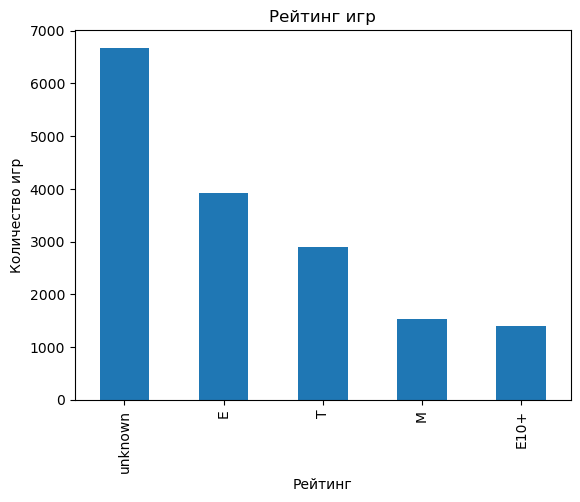

In [19]:
data['rating'] = data['rating'].replace({'EC':'E', 'K-A':'E10+', 'RP':'M', 'AO':'M'})

rating_count = data['rating'].value_counts().plot(kind='bar')
plt.ylabel('Количество игр')
plt.xlabel('Рейтинг')
plt.title('Рейтинг игр');

БОльшая часть рейтинга приходится на "unknown", почти 7000 игр.  
Рейтинг предзназначен для региона США и Канады, в связи с этим многие игры без рейтингов.

### Посчитаем продажи для каждой игры.

In [20]:
data['revenue'] = data['na_sales'] + data['eu_sales'] +  data['jp_sales'] +  data['other_sales'] 
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Промежуточный вывод: в данных много пропусков, природа которых неизвестна, пропуски были оставлены для дальнейшего корректного анализа.  
Также аббревиатура 'tbd' была замена заглушкой и пропуски в столбце rating.  
Был добавлен новый столбец 'revenue', для дальнейших расчётов показателей игр.

## Проведём исследовательский анализ данных.

### Посчитаем выпуск игр по годам.

Рассмотрим, сколько игр выпускалось в разные годы

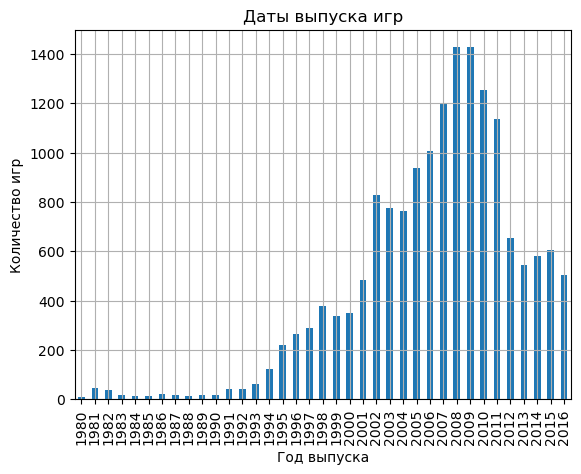

In [21]:
data['year_of_release'].value_counts().sort_index().plot(kind='bar')
plt.title('Даты выпуска игр')
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.grid();

Большинство игр начали выпускаться после 2001 г. Интересен тот факт, что между 2001г. и 2002г. всего 1 год, а в 2002г. было выпущено почти в 2 раза больше игр.  
Удалим игры до 2000 г., чтобы данные были более репрезентативные, тк для текущих реалий могут исказить выводы и их небольшое количество.

In [22]:
data = data[data['year_of_release'] >=2000]

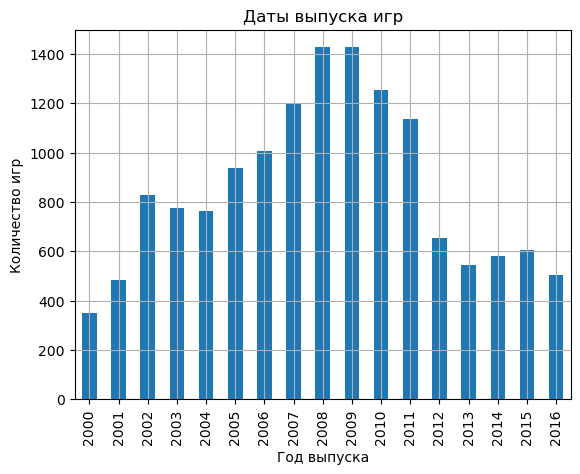

In [23]:
data['year_of_release'].value_counts().sort_index().plot(kind='bar')
plt.title('Даты выпуска игр')
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.grid();

Промежуточный вывод: большинство игр выпустились в период с 2007 по 2011 года, затем выпуск резко пошёл на спад и держится на промежутке 500-600 игр в год.

### Анализ продаж по платформам.

Создадим сводную таблицу, где будут актуальные виды платформ на 2016г., в которой данные будут сгруппированы по платформе и дате релиза

In [24]:
data_group_year_2013 = data.groupby(['platform', 'year_of_release'])['revenue'].sum().reset_index()
data_group_year_2013 = data_group_year_2013[data_group_year_2013['year_of_release'] > 2012]
data_group_year_2013

,platform,year_of_release,revenue
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
5,3DS,2016,15.14
20,DS,2013,1.54
54,PC,2013,12.38
55,PC,2014,13.28
56,PC,2015,8.52
57,PC,2016,5.25
81,PS3,2013,113.25


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


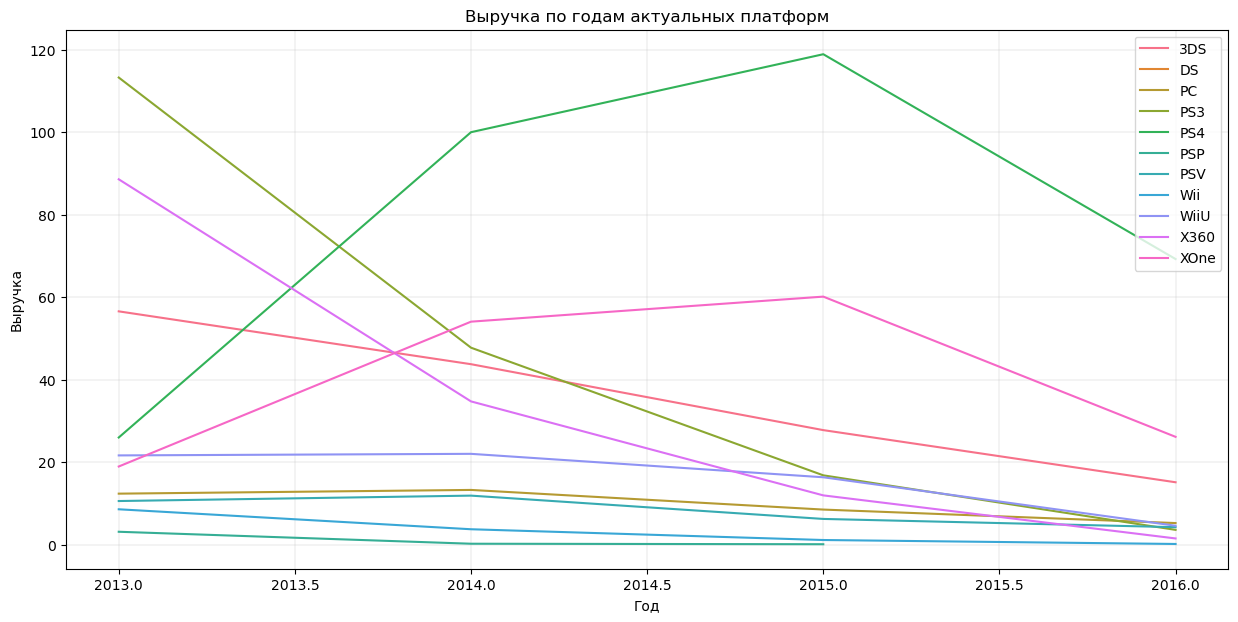

In [25]:
filtered_data = data_group_year_2013[data_group_year_2013['year_of_release'].notna()]

plt.figure(figsize=(15, 7))
ax = sns.lineplot(y='revenue', x='year_of_release', hue='platform', data=filtered_data) 
plt.grid(linewidth= 0.2)
plt.title('Выручка по годам актуальных платформ')
plt.ylabel('Выручка')
plt.xlabel('Год')
plt.legend(loc='upper right');

Промежуточный вывод: исходя из графика мы можем сделать вывод, что из современных платформ (на 2016г.) с самой высокой выручкой является PS4.  
Из 20 платформ актуальны остались всего лишь 9, чуть меньше половины, к тому же 7 из них идут на спад, либо уже спали продажи к 2016 г.  
Наиболее перспективными платформами на 2016г. являются PS4, XOne и 3DS.

### Определим срок жизни платформы.

In [26]:
platform_years = data.loc[:,['platform', 'year_of_release']].drop_duplicates().groupby('platform')['year_of_release'].count().reset_index()
platform_years

,platform,year_of_release
0,3DS,6
1,DC,5
2,DS,10
3,GB,2
4,GBA,8
5,GC,7
6,N64,3
7,PC,17
8,PS,4
9,PS2,12


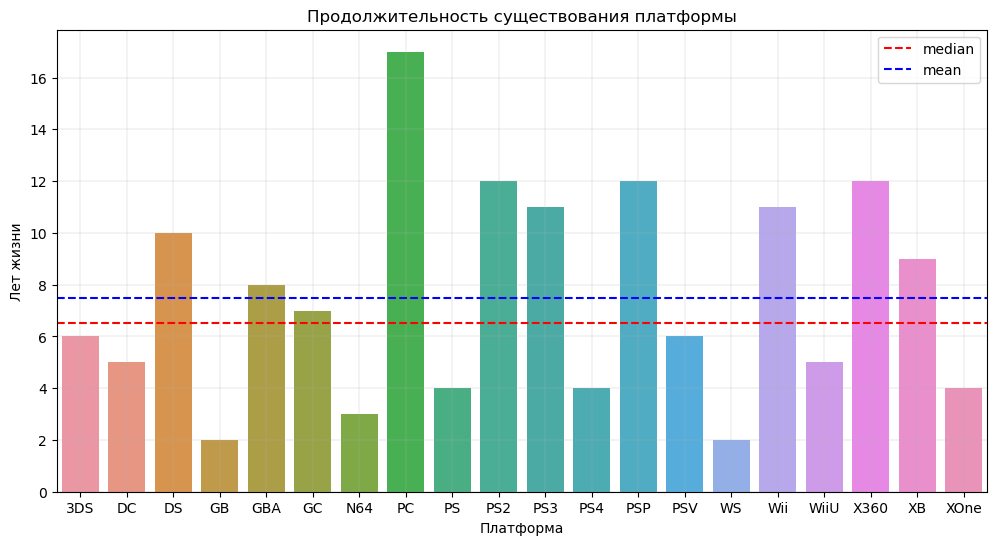

In [27]:
median_years = platform_years['year_of_release'].median()
mean_years = platform_years['year_of_release'].mean()


plt.figure(figsize=(12,6))
sns.barplot(x='platform', y='year_of_release', data=platform_years)
plt.axhline(y=median_years, label='median', color='r', linestyle='--')
plt.axhline(y=mean_years, label='mean', color='b', linestyle='--')
plt.ylabel('Лет жизни')
plt.xlabel('Платформа')
plt.title('Продолжительность существования платформы')
plt.grid(linewidth=0.2)
plt.legend();

Промежуточный вывод: самым "долгожителем" является PC с 17 годами продолжительности пользования, затем идут PS2, PS3, PSP, X360 с 12 годами, плестейшн всегда пользуется популярностью. Это не удивительно, учитывая тот факт, что "железо" в приставках остаётся одним, а комплектующие в PC постоянно обновляется самими пользователями.  
Самыми непродолжительными по сроку пользования являются GB и WS с 2 годами.

In [28]:
platform_years.describe()

,year_of_release
count,20.000000
mean,7.500000
std,4.097496
min,2.000000
25%,4.000000
50%,6.500000
75%,11.000000
max,17.000000


Промежуточный вывод: в среднем платформа пользуется спросом около 7,5 лет., минимально 2 года, а максимально целых 17 лет и продолжает быть популярной.  
### Рассмотрим глобальные продажи игр в разбивке по платформам за последние 3 года.

In [29]:
top_games_2016 = data[data['year_of_release'] >= 2014].sort_values(by='revenue', ascending=False).reset_index().head(15)
                   
name_game = set(top_games_2016['name'].values)

games_platform = (data
                    .query('(year_of_release >= 2014) and (name.isin(@name_game))')
                    .sort_values(by='revenue', ascending=False)
                    .reset_index()
                   )

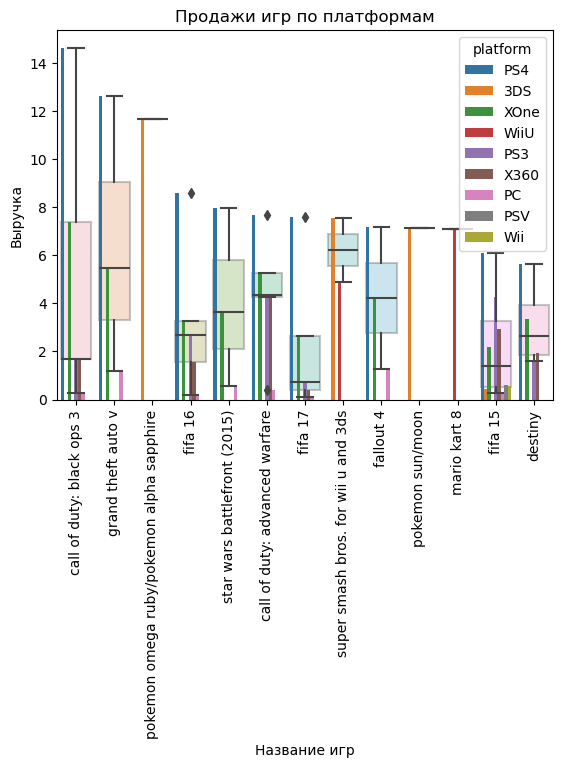

In [30]:
box = sns.boxplot(x='name', y='revenue', data=games_platform, boxprops=dict(alpha=.3))
                
plt.xticks(rotation=90)
box = sns.barplot(x='name',y='revenue', hue = 'platform', data=games_platform)
plt.xlabel('Название игр')
plt.ylabel('Выручка')
plt.title('Продажи игр по платформам');

Промежуточный вывод: исходя из графиков выше мы можем сделать вывод, что самой популярной игрой является "call of duty: black ops 3"
Игры pokemon выпущены эксклюзивно для платформы 3DS, не смотря на это показали хорошие продажи.  
Следом хорошие продажи показали "grand theft auto V" и "fifa 16".  

### Рассмотрим влияние оценки критиков и пользователей на продажи.

Для анализа рассмотрим показатели самой популярной платформы PS4.

,critic_score,user_score,revenue
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
revenue,0.406568,-0.031957,1.000000


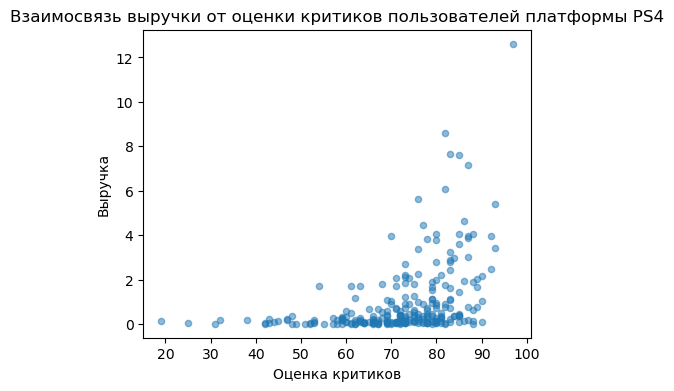

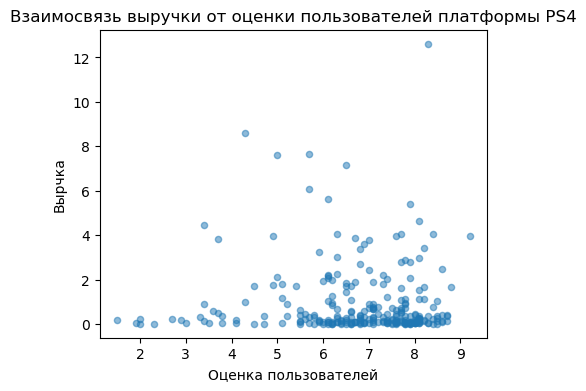

In [31]:
ps4_sample = data[data['platform'] == 'PS4'].loc[:, ['critic_score', 'user_score', 'revenue']].reset_index(drop=True)
display(ps4_sample.corr())

ps4_sample.plot(x='critic_score', y='revenue', kind='scatter', alpha=0.5, figsize=(5,4))
plt.xlabel('Оценка критиков')
plt.ylabel('Выручка')
plt.title('Взаимосвязь выручки от оценки критиков пользователей платформы PS4');

ps4_sample.plot(x='user_score', y='revenue', kind='scatter', alpha=0.5, figsize=(5,4))
plt.xlabel('Оценка пользователей')
plt.ylabel('Вырчка')
plt.title('Взаимосвязь выручки от оценки пользователей платформы PS4');

Промежуточный вывод: рассмотрев графики взаимосвязи между выручкой и оценками пользователей/критиков мы можем сделать вывод, что есть средне-положительное влияние оценки на выручку.  
Больше всего на выручку влияет оценка критиков, корреляция составляет 0.41, оценка пользователей не влияет на выручку, корреляция составляет -0.03. 

### По аналогии рассмотрим три другие популярные платформы - XOne, PS3 и 3DS

,critic_score,user_score,revenue
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
revenue,0.416998,-0.068925,1.000000


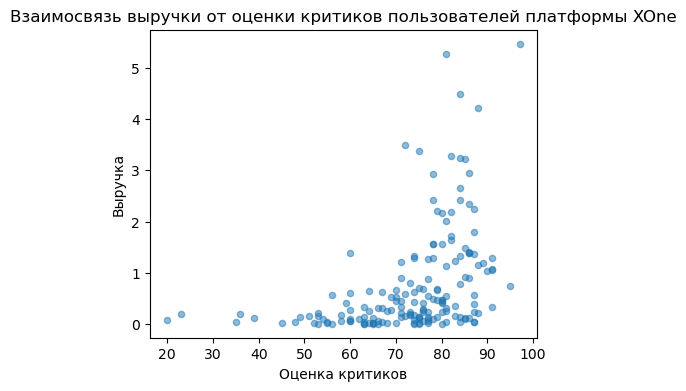

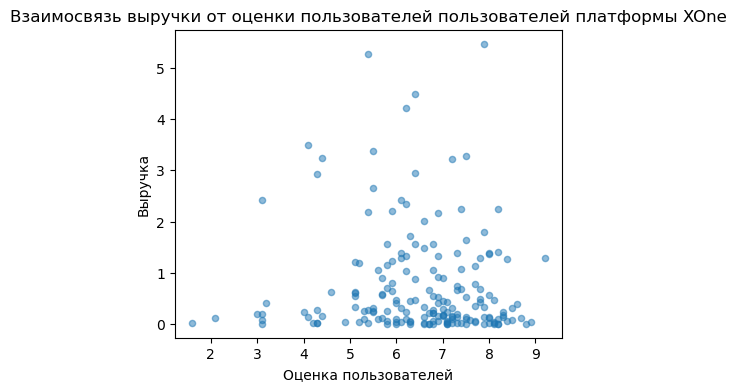

In [32]:
xone_sample = data[data['platform'] == 'XOne'].loc[:, ['critic_score', 'user_score', 'revenue']].reset_index(drop=True) # & (data['user_score'] != 'nan')].loc[:, ['critic_score', 'user_score', 'revenue']].reset_index(drop=True)
display(xone_sample.corr())

xone_sample.plot(x='critic_score', y='revenue', kind='scatter', alpha=0.5, figsize=(5,4))
plt.xlabel('Оценка критиков')
plt.ylabel('Выручка')
plt.title('Взаимосвязь выручки от оценки критиков пользователей платформы XOne');

xone_sample.plot(x='user_score', y='revenue', kind='scatter', alpha=0.5, figsize=(5,4))
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')
plt.title('Взаимосвязь выручки от оценки пользователей пользователей платформы XOne');

У платформы XOne есть средняя положительная взаимосвязь между выручкой и оценкой критиков, корреляция составляет 0.42.  
Между выручкой и оценкой критиков нет взаимосвязи, корреляция составляет -0.07.

,critic_score,user_score,revenue
critic_score,1.000000,0.632847,0.433712
user_score,0.632847,1.000000,0.127926
revenue,0.433712,0.127926,1.000000


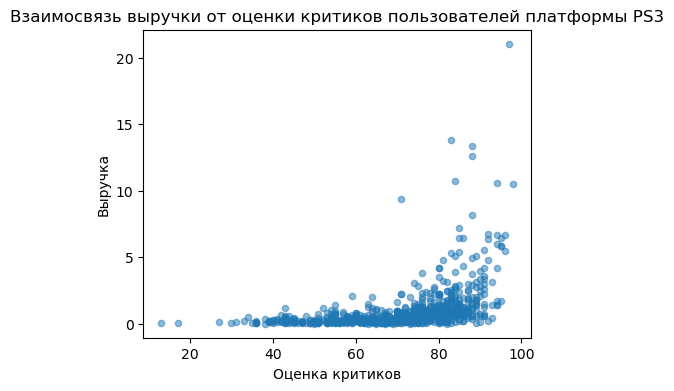

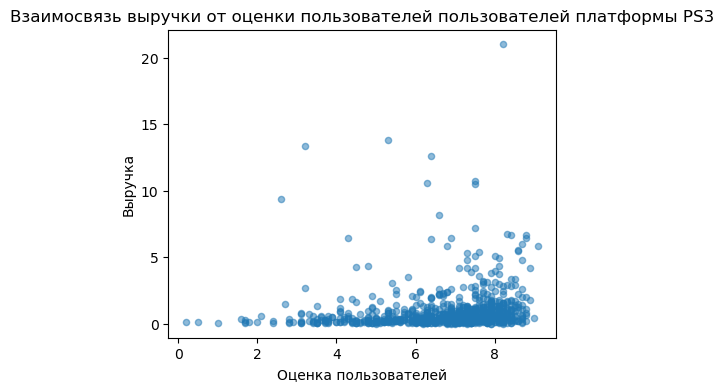

In [33]:
ps3_sample = data[data['platform'] == 'PS3'].loc[:, ['critic_score', 'user_score', 'revenue']].reset_index(drop=True)
display(ps3_sample.corr())

ps3_sample.plot(x='critic_score', y='revenue', kind='scatter', alpha=0.5, figsize=(5,4))
plt.xlabel('Оценка критиков')
plt.ylabel('Выручка')
plt.title('Взаимосвязь выручки от оценки критиков пользователей платформы PS3');

ps3_sample.plot(x='user_score', y='revenue', kind='scatter', alpha=0.5, figsize=(5,4))
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')
plt.title('Взаимосвязь выручки от оценки пользователей пользователей платформы PS3');

У платформы PS3 есть средняя положительная взаимосвязь между выручкой и оценкой критиков, корреляция составляет 0.43.  
Между выручкой и оценкой критиков нет взаимосвязи, корреляция составляет 0.13.

,critic_score,user_score,revenue
critic_score,1.000000,0.745222,0.348740
user_score,0.745222,1.000000,0.222078
revenue,0.348740,0.222078,1.000000


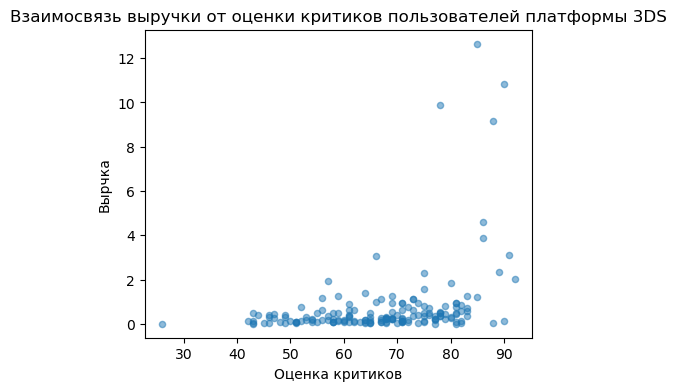

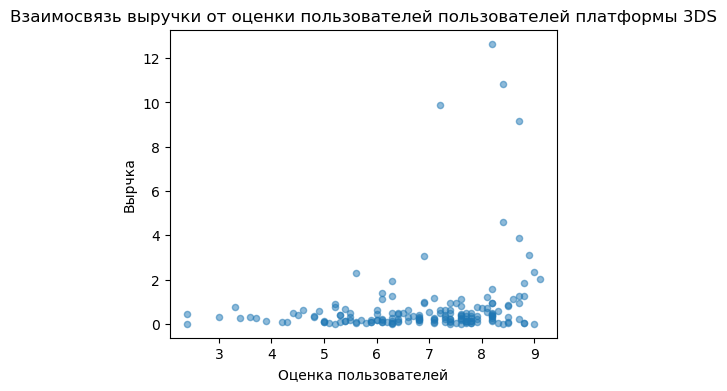

In [34]:
ds_sample = data[data['platform'] == '3DS'].loc[:, ['critic_score', 'user_score', 'revenue']].reset_index(drop=True)
display(ds_sample.corr())

ds_sample.plot(x='critic_score', y='revenue', kind='scatter', alpha=0.5, figsize=(5,4))
plt.xlabel('Оценка критиков')
plt.ylabel('Вырчка')
plt.title('Взаимосвязь выручки от оценки критиков пользователей платформы 3DS');

ds_sample.plot(x='user_score', y='revenue', kind='scatter', alpha=0.5, figsize=(5,4))
plt.xlabel('Оценка пользователей')
plt.ylabel('Вырчка')
plt.title('Взаимосвязь выручки от оценки пользователей пользователей платформы 3DS');

У платформы PS3 есть слабая положительная взаимосвязь между выручкой и оценкой критиков, корреляция составляет 0.35.  
Между выручкой и оценкой критиков практически нет взаимосвязи, корреляция составляет 0.22.

Промежуточный вывод по взаимосвязи между выручкой и оценками критиков/пользователей:  
- оценка критиков средне положительно влияет на выручку;
- оценка пользователей никак не влияет на выручку.

### Посмотрим на общее распределение игр по жанрам.

Посмотрим на количество и выручку жанров игр за последние 5 лет, начиная от 2011г.

In [35]:
data_after_2010 = data[data['year_of_release'] > 2010]
genres_sum = data_after_2010.loc[:,['genre', 'revenue']].drop_duplicates().groupby('genre')['revenue'].sum().reset_index()
genres_sum

,genre,revenue
0,action,372.94
1,adventure,28.66
2,fighting,58.18
3,misc,108.29
4,platform,81.59
5,puzzle,8.01
6,racing,77.48
7,role-playing,199.34
8,shooter,373.45
9,simulation,45.09


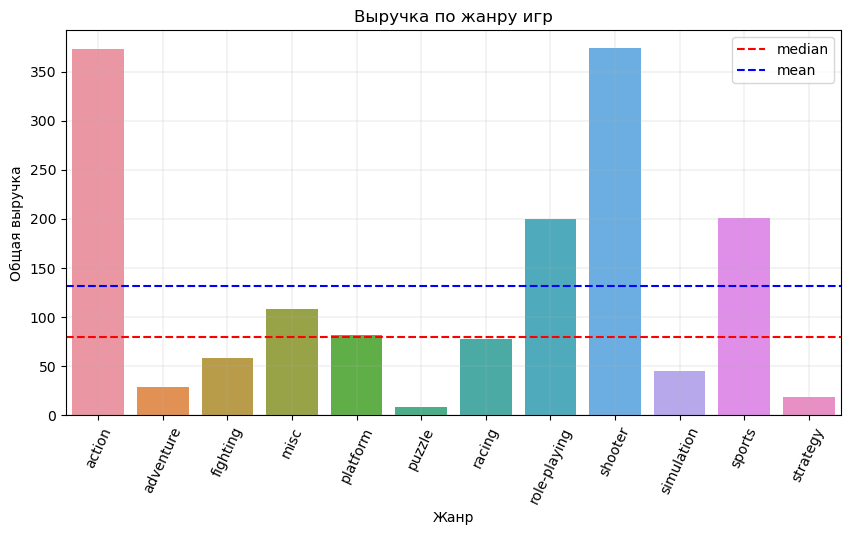

In [36]:
median_genres = genres_sum['revenue'].median()
mean_genres = genres_sum['revenue'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x='genre', y='revenue', data=genres_sum)
plt.xticks(rotation=65)
plt.axhline(y=median_genres, label='median', color='r', linestyle='--')
plt.axhline(y=mean_genres, label='mean', color='b', linestyle='--')
plt.ylabel('Общая выручка')
plt.xlabel('Жанр')
plt.title('Выручка по жанру игр')
plt.grid(linewidth=0.2)
plt.legend();

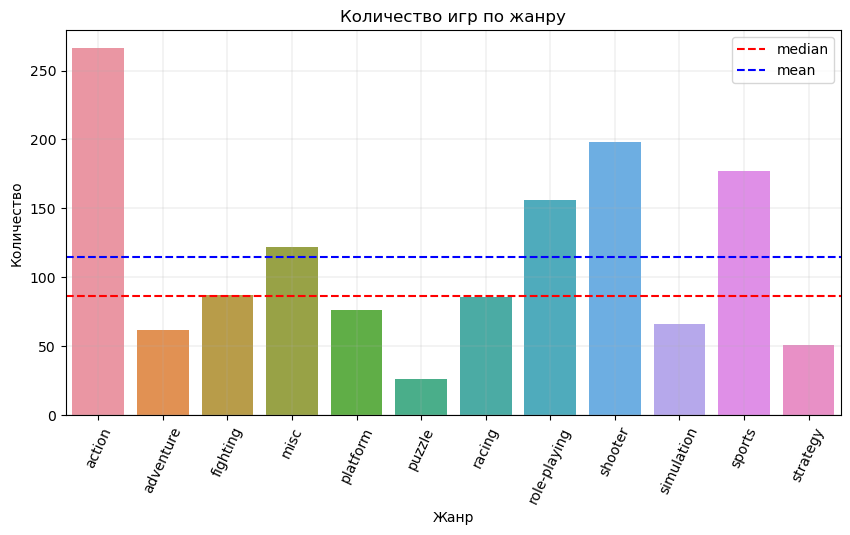

In [37]:
genres_count = data_after_2010.loc[:,['genre', 'revenue']].drop_duplicates().groupby('genre')['revenue'].count().reset_index()

median_genres_count = genres_count['revenue'].median()
mean_genres_count = genres_count['revenue'].mean()


plt.figure(figsize=(10,5))
sns.barplot(x='genre', y='revenue', data=genres_count)
plt.xticks(rotation=65)
plt.axhline(y=median_genres_count, label='median', color='r', linestyle='--')
plt.axhline(y=mean_genres_count, label='mean', color='b', linestyle='--')
plt.ylabel('Количество')
plt.xlabel('Жанр')
plt.title('Количество игр по жанру')
plt.grid(linewidth=0.2)
plt.legend();

Промежуточный вывод: рассмотрев графики мы можем сделать вывод, что самыми популярными и кассовыми жанрами являются "action", "shooter", "sports" и "role-playing".  
Наименее популярными и кассовыми являются "adventure", "puzzle", "simulation" и "strategy".  
Выручка напрямую зависит от количества игр по жанру. 

##  Составим портрет пользователя каждого региона (NA, EU, JP)

### Рассмотрим продажи в регионе NA по платформам, жанрам и рейтингу за последние 3 года.

,platform,na_sales,percent
3,PS4,98.61,34.71
9,XOne,81.27,28.61
8,X360,28.30,9.96
0,3DS,22.64,7.97
2,PS3,22.05,7.76
7,WiiU,19.36,6.82
1,PC,7.23,2.55
5,PSV,2.52,0.89
6,Wii,2.08,0.73
4,PSP,0.00,0.00


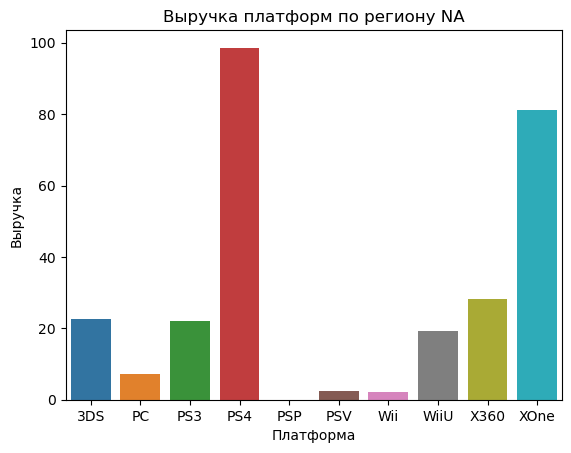

In [38]:
data_after_2013 = data[data['year_of_release'] > 2013]

na_revenue_group = data_after_2013.groupby('platform')['na_sales'].sum().reset_index()
na_revenue_group['percent'] = round((na_revenue_group['na_sales'] / na_revenue_group['na_sales'].sum()) *100, 2)

display(na_revenue_group.sort_values(by='percent', ascending=False))
sns.barplot(x='platform', y='na_sales', data=na_revenue_group)
plt.title('Выручка платформ по региону NA')
plt.xlabel('Платформа')
plt.ylabel('Выручка');

Самыми популярными платформами в регионе NA за последние 3 года являются PS4(34.71%), XOne(28.60%) и X360(9.96%).  
Жители региона NA отдают предпочтение играм на платформе PlayStation и Xbox.

,genre,na_sales,percent
8,shooter,79.02,27.82
0,action,72.53,25.53
10,sports,46.13,16.24
7,role-playing,33.47,11.78
3,misc,15.05,5.30
2,fighting,12.43,4.38
6,racing,8.74,3.08
4,platform,6.79,2.39
1,adventure,5.64,1.99
9,simulation,2.63,0.93


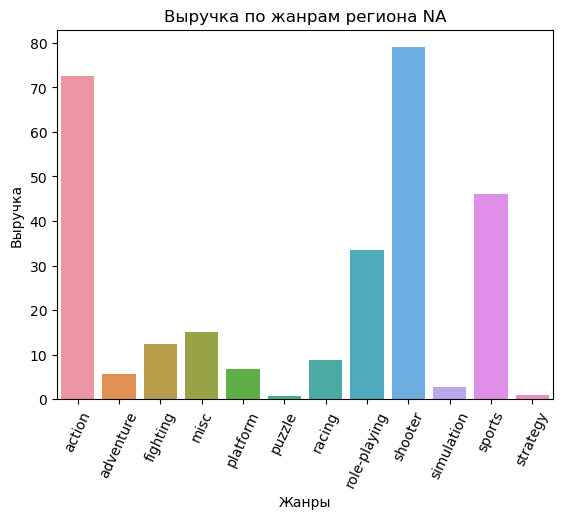

In [39]:
na_revenue_group = data_after_2013.groupby('genre')['na_sales'].sum().reset_index()
na_revenue_group['percent'] = round((na_revenue_group['na_sales'] / na_revenue_group['na_sales'].sum()) *100, 2)

display(na_revenue_group.sort_values(by='percent', ascending=False))
sns.barplot(x='genre', y='na_sales', data=na_revenue_group)
plt.xticks(rotation=65)
plt.title('Выручка по жанрам региона NA')
plt.xlabel('Жанры')
plt.ylabel('Выручка');

Самыми популярными жанрами в регионе NA являются: "shooter"(27.81%), "action"(25.55%),  и "sports"(16.24%).  
Самые не популярные: "simulation"(0.93%), "strategy"(0.34%) и "puzzle"(0.23%).

,rating,na_sales,percent
2,M,96.42,33.94
4,unknown,64.72,22.78
0,E,50.74,17.86
3,T,38.95,13.71
1,E10+,33.23,11.70


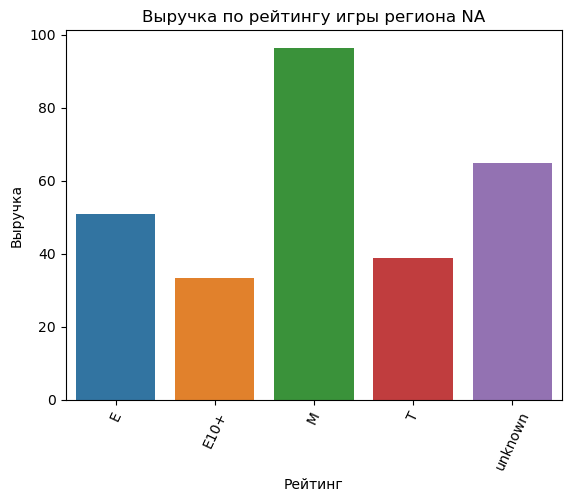

In [40]:
na_revenue_group = data_after_2013.groupby('rating')['na_sales'].sum().reset_index()
na_revenue_group['percent'] = round((na_revenue_group['na_sales'] / na_revenue_group['na_sales'].sum()) *100, 2)

display(na_revenue_group.sort_values(by='percent', ascending=False))
sns.barplot(x='rating', y='na_sales', data=na_revenue_group)
plt.xticks(rotation=65)
plt.title('Выручка по рейтингу игры региона NA')
plt.xlabel('Рейтинг')
plt.ylabel('Выручка');

Самым популярным жанром является "М" (для взрослых, доля 33.94%). Логично предположить, что бОльшая доля игр приходится на взрослых пользователей, играющих в игры жанры "action" и "shooter", рейтинг большинства приходится именно на "М".

### Рассмотрим продажи в регионе EU по платформам, жанрам и рейтингу за последние 3 года.

,platform,eu_sales,percent
3,PS4,130.04,48.04
9,XOne,46.25,17.09
2,PS3,25.54,9.44
1,PC,17.97,6.64
0,3DS,16.12,5.96
8,X360,15.49,5.72
7,WiiU,13.15,4.86
5,PSV,3.53,1.30
6,Wii,2.59,0.96
4,PSP,0.00,0.00


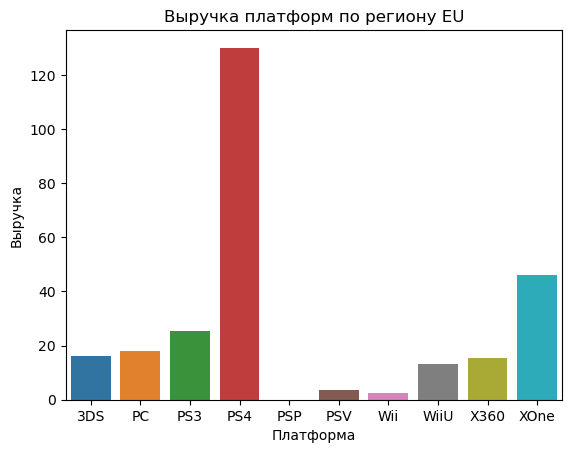

In [41]:
eu_revenue_group = data_after_2013.groupby('platform')['eu_sales'].sum().reset_index()
eu_revenue_group['percent'] = round((eu_revenue_group['eu_sales'] / eu_revenue_group['eu_sales'].sum()) *100, 2)

display(eu_revenue_group.sort_values(by='percent', ascending=False))
sns.barplot(x='platform', y='eu_sales', data=eu_revenue_group)
plt.title('Выручка платформ по региону EU')
plt.xlabel('Платформа')
plt.ylabel('Выручка');

Самые популярные платформы в регионе EU являются PS4(почти половина пользователей - 48.04%), XOne(17.09%) и PS3(9.44%). 

,genre,eu_sales,percent
0,action,74.68,27.59
8,shooter,65.52,24.21
10,sports,45.73,16.89
7,role-playing,28.17,10.41
6,racing,14.13,5.22
3,misc,12.86,4.75
9,simulation,7.30,2.70
4,platform,6.80,2.51
2,fighting,6.69,2.47
1,adventure,6.49,2.40


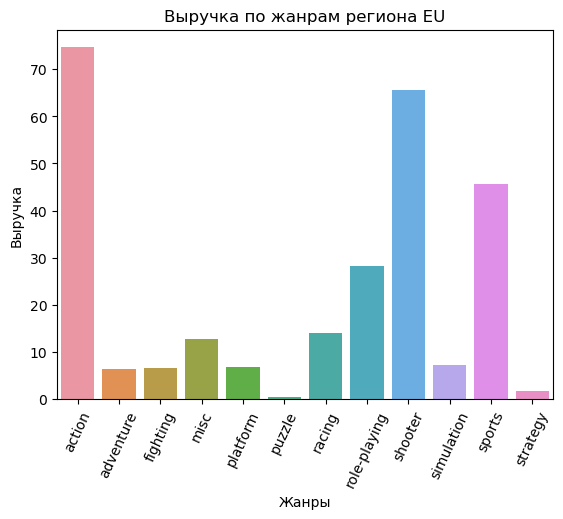

In [42]:
eu_revenue_group = data_after_2013.groupby('genre')['eu_sales'].sum().reset_index()
eu_revenue_group['percent'] = round((eu_revenue_group['eu_sales'] / eu_revenue_group['eu_sales'].sum()) *100, 2)

display(eu_revenue_group.sort_values(by='percent', ascending=False))
sns.barplot(x='genre', y='eu_sales', data=eu_revenue_group)
plt.xticks(rotation=65)
plt.title('Выручка по жанрам региона EU')
plt.xlabel('Жанры')
plt.ylabel('Выручка');

Самые популярные жанры в регионе EU: "action"(27.59%), "shooter"(24.21%) и "sports"(16.89%).  
Самыми не популярными являются: "adventure"(2.40%), "strategy"(0.66%) и "puzzle"(0.19%).

,rating,eu_sales,percent
2,M,93.44,34.52
4,unknown,58.95,21.78
0,E,58.06,21.45
3,T,34.07,12.59
1,E10+,26.16,9.66


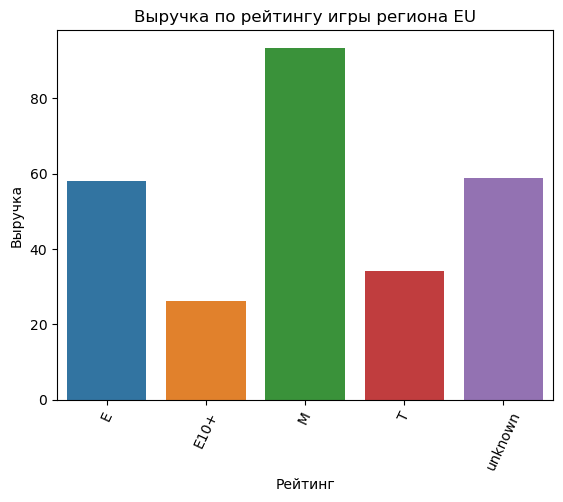

In [43]:
eu_revenue_group = data_after_2013.groupby('rating')['eu_sales'].sum().reset_index()
eu_revenue_group['percent'] = round((eu_revenue_group['eu_sales'] / eu_revenue_group['eu_sales'].sum()) *100, 2)

display(eu_revenue_group.sort_values(by='percent', ascending=False))
sns.barplot(x='rating', y='eu_sales', data=eu_revenue_group)
plt.xticks(rotation=65)
plt.title('Выручка по рейтингу игры региона EU')
plt.xlabel('Рейтинг')
plt.ylabel('Выручка');

В регионе EU самым популярным рейтингом является "М"(34.52%), всё благодаря популярным жанрам как шутеры и экшн.

### Рассмотрим продажи в регионе JP по платформам, жанрам и рейтингу за последние 3 года.

,platform,jp_sales,percent
0,3DS,44.24,47.52
3,PS4,15.02,16.13
5,PSV,14.54,15.62
2,PS3,11.22,12.05
7,WiiU,7.31,7.85
4,PSP,0.36,0.39
9,XOne,0.32,0.34
8,X360,0.08,0.09
1,PC,0.00,0.00
6,Wii,0.00,0.00


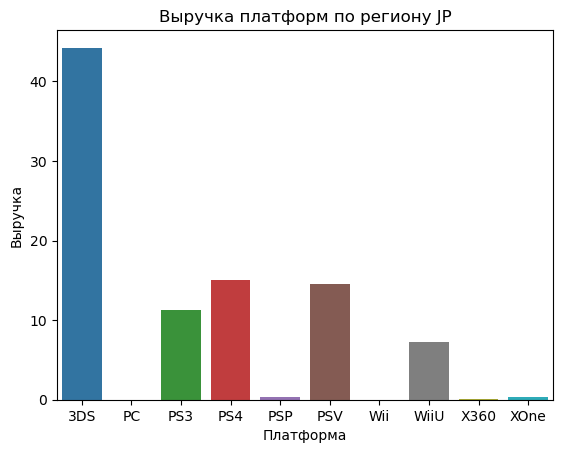

In [44]:
jp_revenue_group = data_after_2013.groupby('platform')['jp_sales'].sum().reset_index()
jp_revenue_group['percent'] = round((jp_revenue_group['jp_sales'] / jp_revenue_group['jp_sales'].sum()) *100, 2)

display(jp_revenue_group.sort_values(by='percent', ascending=False))
sns.barplot(x='platform', y='jp_sales', data=jp_revenue_group)
plt.title('Выручка платформ по региону JP')
plt.xlabel('Платформа')
plt.ylabel('Выручка');

Наиболее популярной платформой в регионе JP являются 3DS(47.52%, это в 3 раза больше ближайшей платформы по выручке), PS4(16.13%) и PSV(15.62%).  
В Японии широко развиты игры и жители этого региона играют во всех местах. 3DS и PSV являются портативными платформами, благодаря уникальному пользовательскому опыту именно портативные платформы наиболее популярны.  
Также игра pokemon, выпустившаяся эксклюзивно для платформы 3DS, дала хороший буст для показателя этой платформы.

,genre,jp_sales,percent
7,role-playing,31.16,33.47
0,action,29.58,31.78
2,fighting,6.37,6.84
3,misc,5.61,6.03
8,shooter,4.87,5.23
1,adventure,3.60,3.87
10,sports,3.26,3.50
4,platform,2.69,2.89
9,simulation,2.31,2.48
6,racing,1.76,1.89


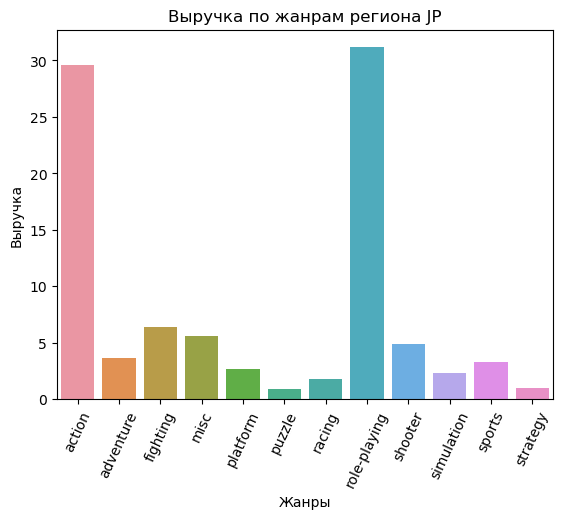

In [45]:
jp_revenue_group = data_after_2013.groupby('genre')['jp_sales'].sum().reset_index()
jp_revenue_group['percent'] = round((jp_revenue_group['jp_sales'] / jp_revenue_group['jp_sales'].sum()) *100, 2)

display(jp_revenue_group.sort_values(by='percent', ascending=False))
sns.barplot(x='genre', y='jp_sales', data=jp_revenue_group)
plt.xticks(rotation=65)
plt.title('Выручка по жанрам региона JP')
plt.xlabel('Жанры')
plt.ylabel('Выручка');

В регионе JP самыми популярными игровыми жанрами являются: "role-playing"(33.47%), "action"(31.78%) и "fighting"(6.84%).  
Наименее популярные: "racing"(1.89%), "strategy"(1.02%) и "puzzle"(1.00%).  
В данном регионе жанры "shooter" и "sports" не так популярны, как в других регионах.

,rating,jp_sales,percent
4,unknown,56.90,61.12
3,T,14.78,15.88
0,E,8.94,9.60
2,M,8.01,8.60
1,E10+,4.46,4.79


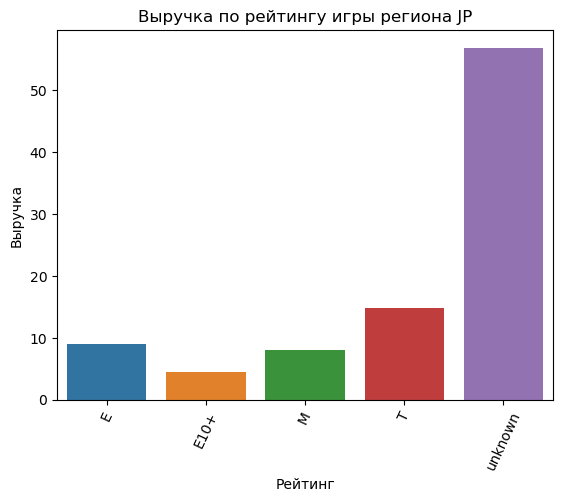

In [46]:
jp_revenue_group = data_after_2013.groupby('rating')['jp_sales'].sum().reset_index()
jp_revenue_group['percent'] = round((jp_revenue_group['jp_sales'] / jp_revenue_group['jp_sales'].sum()) *100, 2)

display(jp_revenue_group.sort_values(by='percent', ascending=False))
sns.barplot(x='rating', y='jp_sales', data=jp_revenue_group)
plt.xticks(rotation=65)
plt.title('Выручка по рейтингу игры региона JP')
plt.xlabel('Рейтинг')
plt.ylabel('Выручка');

В регионе JP самый популярный рейтинг "unknown" (61.12%).  
Рейтинг ESRB ориентирован на пользователей США и Канады, соответственно на игры для жителей Японии нет как такового рейтинга.

Промежуточный вывод:  
- в регионах NA и EU самые популярные платформы фирм PlayStation и Xbox, в регионе JP платформа Nintendo 3DS;
- в регионах NA и EU наиболее популярные жанры "shooter" и "action", в регионе JP "role-playing" и "action";
- в регионах NA и EU самый популярный рейтинг "М"(для взрослых), в JP популярны игры без рейтинга.

##  Проверим гипотезы.

Гипотеза 1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".  
Выдвинем нулевую и альтернативные гипотезы:
- нулевая: средние пользовательские рейтинг платформ Xbox One и PC равны;
- альтернативная: средние пользовательские рейтинг платформ Xbox One и PC разные.

In [47]:
tt_data = data.dropna(subset=['user_score'])

print('Средняя пользовательская оценка Xbox One: ', tt_data[tt_data['platform'] == 'XOne']['user_score'].mean())
print('Средняя пользовательская оценка PC: ', tt_data[tt_data['platform'] == 'PC']['user_score'].mean())

alpha = 0.05

results = st.ttest_ind(tt_data[tt_data['platform'] == 'XOne']['user_score'], tt_data[tt_data['platform'] == 'PC']['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя пользовательская оценка Xbox One:  6.521428571428572
Средняя пользовательская оценка PC:  7.0340599455040875
p-значение: 3.750185722417337e-05
Отвергаем нулевую гипотезу


Нулевую гипотезу о том, что средняя оценка пользователей платформ Xbox One и PC одинакова отвергаем.

Гипотеза 2: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.".  
Выдвинем нулевую и альтернативные гипотезы:
- нулевая: средние пользовательские рейтинг жанров Action и Sports равны;
- альтернативная: средние пользовательские рейтинг жанров Action и Sports разные.

In [48]:
print('Средняя пользовательская оценка Xbox One: ', tt_data[tt_data['genre'] == 'action']['user_score'].mean())
print('Средняя пользовательская оценка PC: ', tt_data[tt_data['genre'] == 'sports']['user_score'].mean())

alpha = 0.05

results = st.ttest_ind(tt_data[tt_data['genre'] == 'action']['user_score'], tt_data[tt_data['genre'] == 'sports']['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя пользовательская оценка Xbox One:  7.045648512071869
Средняя пользовательская оценка PC:  6.949072356215213
p-значение: 0.0952446346492898
Не получилось отвергнуть нулевую гипотезу


В ходе проведения т-теста не удалось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинг жанров Action и Sports равны.

##  Общий вывод

В ходе исследования были сделаны слещующие выводы:
- большинство игр выпустились в период с 2007 по 2011 года, затем выпуск резко пошёл на спад и держится на промежутке 500-600 игр в год.
- наиболее перспективными платформами на 2016г. являются PS4, XOne и 3DS (3DS популярна только в Японии).
- в среднем платформа пользуется спросом около 7,5 лет, PC является долгожителем и популярна уже 17 лет.
- самые популярные игры: "call of duty: black ops 3", "pokemon", "grand theft auto V" и "fifa 16".  
- оценка критиков средне положительно влияет на выручку, а оценка пользователей никак не влияет на выручку.
- самыми популярными и кассовыми жанрами являются "action", "shooter", "sports" и "role-playing".
- в регионах NA и EU самые популярные платформы фирм PlayStation и Xbox, в регионе JP платформа Nintendo 3DS;
- в регионах NA и EU наиболее популярные жанры "shooter" и "action", в регионе JP "role-playing" и "action";
- в регионах NA и EU самый популярный рейтинг "М"(для взрослых), в JP игры без рейтинга.

Также в ходе исследования было выдвинуто 2 гипотезы.  
Гипотеза 1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".  
- Нулевую гипотезу о том, что средняя оценка пользователей платформ Xbox One и PC одинакова отвергаем.

Гипотеза 2: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."
- В ходе проведения т-теста не удалось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинг жанров Action и Sports равны.

Благодаря проведенному исследованию и полученным выводам мы получили важную информацию, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.